In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  
import emcee
import math
import matplotlib
from pylab import *
import matplotlib.patheffects as PathEffects
hfont = {'fontname':'Times New roman'}


N0 = pow(10.0, 13.64)


mpl.rcParams['legend.numpoints'] = 1



hfont = {'fontname':'Times New roman'}

In [2]:
# real as real
min_sn = np.array([ 0.0,  1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0, 14.0, 18.0, 22.0, 30.0])
max_sn = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0, 14.0, 18.0, 22.0, 30.0, 38.0])



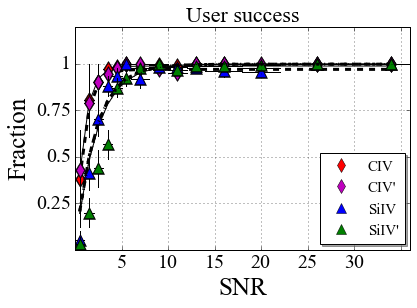

In [27]:
# plot the data
# x, y labels and title
plt.ylabel('Fraction', **hfont,  fontsize=25)
plt.xlabel('SNR', **hfont,  fontsize=25)
#plt.title('User success', **hfont,  fontsize=25)

# x and y ranges and scale
plt.xlim([0, 36])
plt.ylim([0,1.2])
value = np.array([0.383202,0.804107,0.901429,0.971258,0.981154, 1.0,
                  0.978355,0.992481,0.988889, 1.00000,0.997368,0.980000, 1.00000,0.999091])
mid_sn = min_sn + (max_sn - min_sn)/2.0
fit_mid_sn = mid_sn
z = 1.96


n = np.array([762, 633, 420, 336, 208, 144, 231, 133,  90,  52,  57,  25,   8,  11])
ns = n*value
nf = n - ns
error = z*pow(ns*nf/n, 0.5)/100.0
error[np.where(error < 0.001)] = 0.001
upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0

f  =  0.97 *(1.0 - np.exp(-fit_mid_sn/0.993))
plt.plot(fit_mid_sn, f, 'k--', lw = 3, alpha = 1)

f  = 0.988*(1.0 - np.exp(-fit_mid_sn/0.93))
plt.plot(fit_mid_sn, f, 'k-', lw = 1, alpha = 1)


# x and y ticks
xlabels = [' ', '5', '10', '15', '20', '25', '30', ' ']
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35], 
            xlabels, **hfont, fontsize = 20)
ylabels = [' ', '0.25', '0.5', '0.75', '1']
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], 
            ylabels, **hfont, fontsize = 20)

plt.grid(True)


# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)

# plot the bin boundaries
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)

    
# plot the results
plt.plot(mid_sn, value, 'kd', markersize=12, alpha=1.0)  
plt.plot(mid_sn, value, 'rd', markersize=10, alpha=1.0, label = "CIV")    

########################################################################
value = np.array([0.430622,  0.789855,  0.900901,  0.943662,  0.979167,  
                  1.00000,   1.00000,  0.971429,  0.952381,   1.00000,   
                  1.00000,   1.00000,   1.00000,   1.00000])
n = np.array([209, 138, 111,  71,  48,  40,  81,  35,  21,  14,   9,   8,   2,   2])
ns = n*value
nf = n - ns
error = z*pow(ns*nf/n, 0.5)/100.0
error[np.where(error < 0.001)] = 0.001
upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0

# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)

# plot the bin boundaries
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)

    
# plot the results
plt.plot(mid_sn, value, 'kd', markersize=12, alpha=1.0)  
plt.plot(mid_sn, value, 'md', markersize=10, alpha=1.0, label = "CIV'")   

########################################################################
value = np.array([0.0530303, 0.411111, 0.701031, 0.880597, 0.935065, 0.997959, 0.920455, 
                  0.984444, 0.983636, 0.980000, 0.962025, 0.957447,
                  1.00000,
                  1.00000])


mid_sn = min_sn + (max_sn - min_sn)/2.0
fit_mid_sn = mid_sn

z = 1.96


n = np.array([132, 90, 97, 67, 77, 49, 88, 90, 55, 50, 79, 47, 27, 29])
ns = n*value
nf = n - ns
error = z*pow(ns*nf/n, 0.5)/100.0
error[np.where(error < 0.001)] = 0.001
upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0

f  =  0.998*(1.0 - np.exp(-fit_mid_sn/2.16))
plt.plot(fit_mid_sn, f, 'k--', lw = 3, alpha = 1)

f  = 1.0*(1.0 - np.exp(-fit_mid_sn/2.3))
plt.plot(fit_mid_sn, f, 'k-', lw = 1, alpha = 1)


# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)

# plot the bin boundaries
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)

    
# plot the results
plt.plot(mid_sn, value, 'k^', markersize=12, alpha=1.0)  
plt.plot(mid_sn, value, 'b^', markersize=10, alpha=1.0, label = "SiIV") 


########################################################################
value = np.array([0.0320000, 0.200000, 0.438095, 0.567164, 0.870492, 
                  0.923529, 0.979121, 0.999091, 0.966667, 0.986508, 
                  0.986667, 0.995000,  1.00000,  1.00000])

n = np.array([ 125,  95, 105,  67,  61,  68,  91,  88,  60,  63,  60,  40,  36,  21])
ns = n*value
nf = n - ns
error = z*pow(ns*nf/n, 0.5)/100.0
error[np.where(error < 0.001)] = 0.001
upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0

# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)

# plot the bin boundaries
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)

    
# plot the results
plt.plot(mid_sn, value, 'k^', markersize=12, alpha=1.0)  
plt.plot(mid_sn, value, 'g^', markersize=10, alpha=1.0, label = "SiIV'")   


f  =  0.998*(1.0 - np.exp(-fit_mid_sn/2.16))
plt.plot(fit_mid_sn, f, 'k-.', lw = 3, alpha = 1)

f  = 1.0*(1.0 - np.exp(-fit_mid_sn/2.3))
plt.plot(fit_mid_sn, f, 'k:', lw = 1, alpha = 1)








plt.title('User success', **hfont,  fontsize=22)

# add legend
plt.rc('legend',**{'fontsize':15})
plt.rc('font',family='Times New Roman')
plt.legend(bbox_to_anchor=(1.07, -0.1), loc=4, borderaxespad=1.9, shadow=True)


plt.savefig('/Users/alex/Desktop/final_files/correct_precision/paper2/plots/combined_success.png', bbox_inches='tight', figsize=[24,12], dpi=500)